In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import sensitivitytoolbox as st

### Definition of the pulses

A first pulse is initialized as a CavityPulse. It is then sampled to create a second InterpolatedPulse.
Both are plotted.

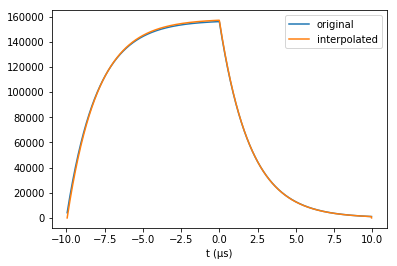

In [22]:
rabi_max = np.pi / 20e-6
area = np.pi / 2

pulse1 = st.pulses.CavityPulse(n=5, tau=2e-6, rabi_max=rabi_max, pulse_area=area)

t_ech = np.linspace(pulse1.begin, pulse1.end, 10000)
pulse2 = st.interpolatedpulse.InterpolatedPulse(values=pulse1(t_ech), rabi_max=rabi_max, pulse_area=area)

t = np.linspace(pulse2.begin, pulse2.end, 1000)
plt.figure()
plt.plot(t * 1e6, pulse1(t), label='original')
plt.plot(t * 1e6, pulse2(t), label='interpolated')

plt.legend()
plt.xlabel('t (µs)');

### Calculating the selectivity to detuning

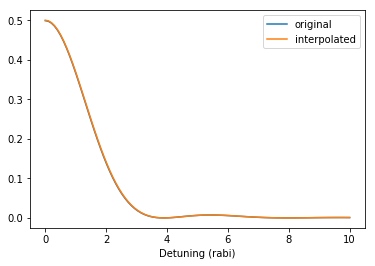

In [23]:
detunings = np.linspace(0, 10*rabi_max, 100)

selectivity1 = st.evolution_toolbox.pulse_selectivity(pulse1, detunings)
selectivity2 = st.evolution_toolbox.pulse_selectivity(pulse2, detunings)

plt.figure()
plt.plot(detunings / rabi_max, selectivity1, label='original')
plt.plot(detunings / rabi_max, selectivity2, label='interpolated')

plt.legend()
plt.xlabel('Detuning (rabi)');